In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting options
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

In [5]:
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))
sample_a[:10]

array([-1.49027091, -0.57389219, -0.03601074, -1.48988781,  0.17584135,
       -0.03602739, -0.61071178, -2.56856379, -0.06063843,  0.24683208])

Text(0.5,1,'Boxplot of a Normal Distribution')

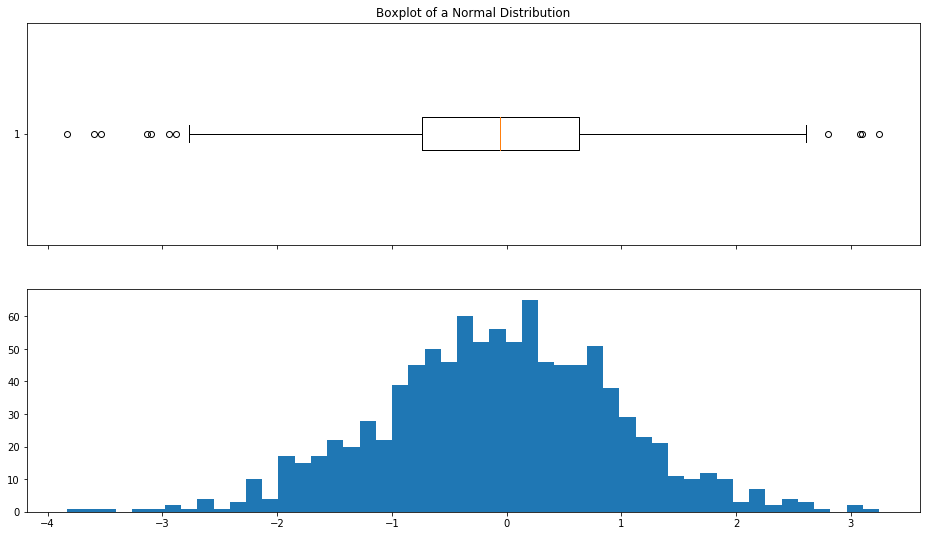

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
axes[0].boxplot(sample_a, vert=False)
axes[1].hist(sample_a, bins=50)
axes[0].set_title("Boxplot of a Normal Distribution")

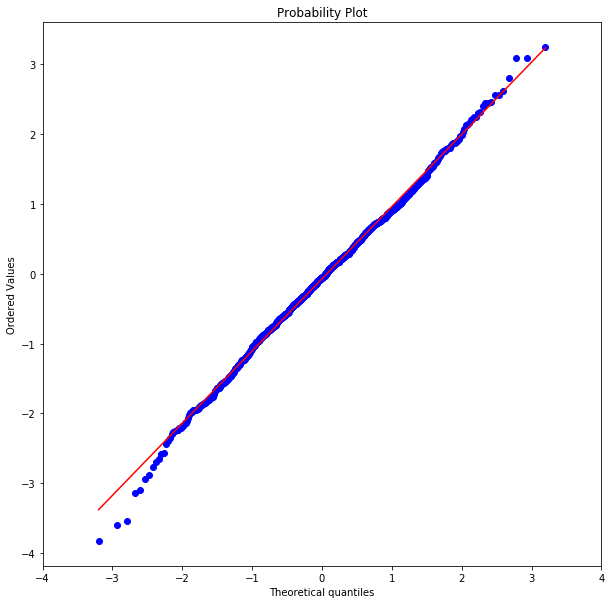

In [15]:
# Q-Q plot of normally-distributed sample
# The Q-Q plot will tell us how much our data matches a normal distribution
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_a, dist='norm', plot=plt);

In [11]:
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))
sample_b[:10]

array([1.00054138, 0.99806413, 0.6186026 , 0.86161136, 0.65309876,
       0.87819918, 0.83230236, 0.70971513, 1.06578808, 0.73545749])

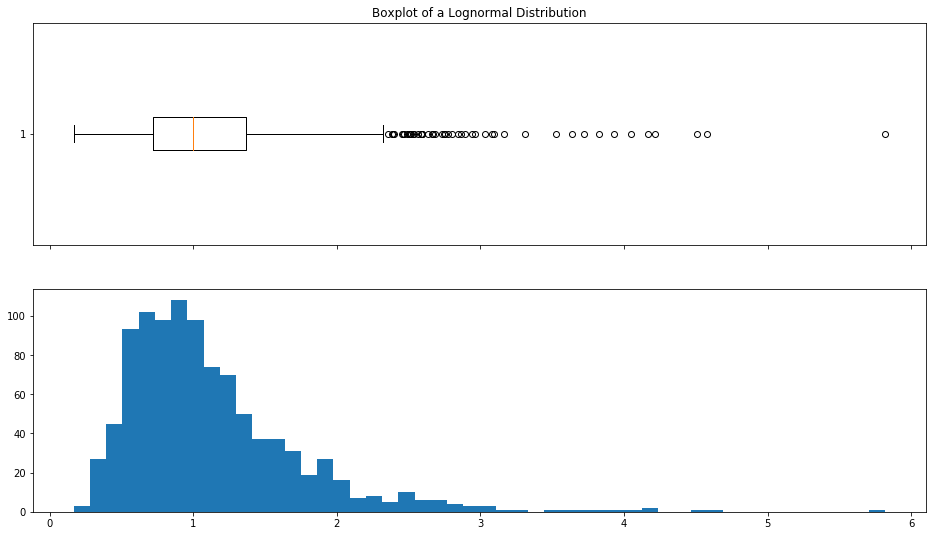

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
axes[0].boxplot(sample_b, vert=False)
axes[1].hist(sample_b, bins=50)
axes[0].set_title("Boxplot of a Lognormal Distribution");

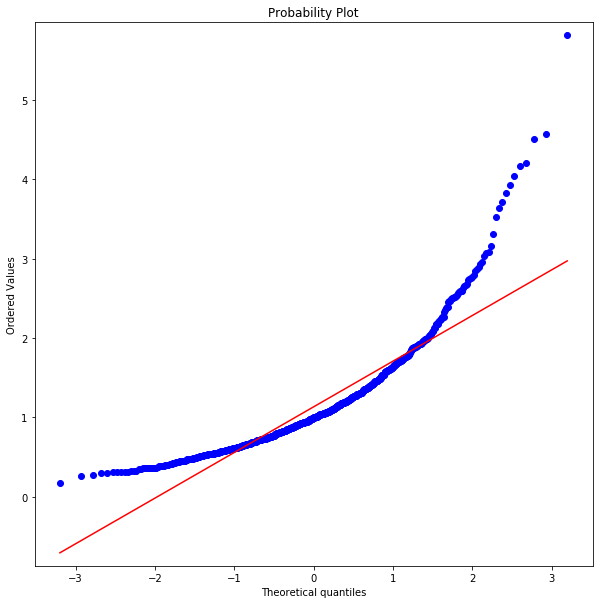

In [17]:
# Q-Q plot of non-normally-distributed sample
#We can see that with the data here does not match a normal distribution
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_b, dist='norm', plot=plt);

In [23]:
# Much of the analysis here requires that our data be normally distributed
# To check for normality, we run a number of statistical tests

#Shapiro-Wilkes
#https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html
#This test compares your distribution against the normal distribution


t_a, p_a = stats.shapiro(sample_a, )
test_res_a = p_a > 0.05
print('sample_a is normally distributed: {}'.format(test_res_a))

t_b, p_b = stats.shapiro(sample_b)
test_res_b = p_b > 0.05
print('sample_b is normally distributed: {}'.format(test_res_b))

sample_a is normally distributed: True
sample_b is normally distributed: False


In [28]:
#Kolmogorov-Smirnov 
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
#this test compares your distribution against a theoretical distribution


t_a, p_a = stats.kstest(sample_a, 'norm', (sample_a.mean(), sample_a.std()))
test_res_a = p_a > 0.05
print('sample_a is normally distributed: {}'.format(test_res_a))

t_a, p_a = stats.kstest(sample_b, 'norm', (sample_b.mean(), sample_b.std()))
test_res_b = p_b > 0.05
print('sample_b is normally distributed: {}'.format(test_res_b))

sample_a is normally distributed: True
sample_b is normally distributed: False


In [ ]:
#Stationarity assumption
#mean, variance and covariance are the same over time
#we want to really make sure we have constant variance over time: Homoskedastic
#Variance changing through time: Heteroskedastic
#log returns creates homoskedastic data

In [ ]:
#box cox transformation
#perform some monotonic transformation on data
#r-square: degree to which the variance in the y-variable is caused by variance in the x-variable
#adjusted r-square
#F-test

In [30]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    
    xVar = xSeries.values.reshape(xSeries.shape[0], 1)
    yVar = ySeries.values.reshape(ySeries.shape[0], 1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    model = lr.fit(xVar, yVar)
#     print(model.coef_[0][0])
#     print(model.intercept_[0])
    
    #TODO: obtain the slope and intercept
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    
    return (slope, intercept)

In [ ]:
#Stationarity of time series
#Take the difference of time series
#keep taking the difference to check to make sure the returns are stationary
#for example if returns for t and t-1 are not stationary, take t-2, t-3 and so on
#When you find the time lag that leads to stationary returns then you have a time series of order D

In [32]:
s = pd.Series(np.random.rand(100))

In [35]:
s.values

array([0.83442663, 0.07457752, 0.18907175, 0.50121059, 0.25935415,
       0.57881242, 0.54867664, 0.97857987, 0.86912031, 0.63211573,
       0.41785512, 0.24193202, 0.46185197, 0.68730453, 0.53602857,
       0.08874133, 0.41161465, 0.69226372, 0.19386702, 0.98564634,
       0.61697183, 0.41887553, 0.60551795, 0.01155636, 0.59052513,
       0.0828801 , 0.7358845 , 0.30391206, 0.52928963, 0.1513432 ,
       0.34895597, 0.82951019, 0.59200697, 0.11597738, 0.42714117,
       0.34782477, 0.13285124, 0.4197829 , 0.93350918, 0.75208301,
       0.15743715, 0.82595757, 0.27487865, 0.11560318, 0.77106831,
       0.9981642 , 0.81346145, 0.94858211, 0.46949115, 0.93360711,
       0.78250805, 0.9363623 , 0.01116565, 0.98385588, 0.41056536,
       0.71360159, 0.63565471, 0.86768839, 0.89313862, 0.00538415,
       0.51780788, 0.53758176, 0.90816191, 0.57406177, 0.57417427,
       0.84585279, 0.28470766, 0.76462189, 0.17823391, 0.11618878,
       0.26333934, 0.27658679, 0.25495465, 0.92460863, 0.50424